### Load image data

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import os 
import cv2

from sklearn.model_selection import train_test_split
from tensorflow import keras
from keras.preprocessing.image import load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras import utils
from tensorflow.keras.callbacks import EarlyStopping


file path did not work
file path did not work
file path did not work


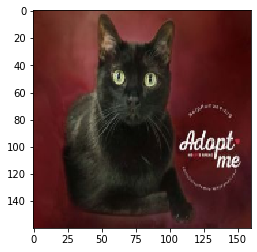

In [2]:
data = []
dirpath = "datasets/cat_imgs"
folders = ['tabby', 'siamese','bombay']
for folder in folders:
    path = os.path.join(dirpath, folder)
    for img_path in os.listdir(path):
        try: 
            image_arr = cv2.imread(os.path.join(path, img_path))
            img_rgb=cv2.cvtColor(image_arr, cv2.COLOR_BGR2RGB)
            new_array = cv2.resize(img_rgb,(160, 160))
            data.append([new_array, folders.index(folder)])
            plt.imshow(new_array)
        except:
            print("file path did not work")
        

### EDA

In [3]:
# check how many images I have 
len(data)

832

In [4]:
X = []
y = []
for feature, label in data:
    X.append(feature)
    y.append(label)

In [5]:
np.array(X).shape


(832, 160, 160, 3)

In [6]:
graph_y = pd.Series(y).map({0:'orange tabby', 1:'siamese', 2: 'bombay'})

Text(0.5, 0, 'Cat breeds')

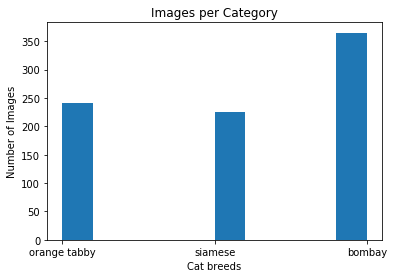

In [7]:
plt.hist(graph_y)
plt.title('Images per Category')
plt.ylabel('Number of Images')
plt.xlabel('Cat breeds')

### Feature engenierring  

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [9]:
y_train = utils.to_categorical(y_train, 3)
y_test = utils.to_categorical(y_test, 3)

In [10]:
#Normalize the scale to 0-1
X_train = np.array(X_train).astype('float32')
X_test = np.array(X_test).astype('float32')

X_train /= 255
X_test /= 255

In [11]:
y_train[0:5]

array([[1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.]], dtype=float32)

### Modeling

#### Convolutional Neural Network 

In [12]:
cnn_model = Sequential()

In [13]:
#first convolutional layer
cnn_model.add(Conv2D(filters=64,            
                     kernel_size=(3, 3),        
                     activation='relu',      
                     input_shape=(160, 160, 3)))
cnn_model.add(MaxPooling2D(pool_size=(2,2)))

#second convolutional layer
cnn_model.add(Conv2D(filters=128,            
                     kernel_size=(3, 3),        
                     activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2,2)))

#second convolutional layer
cnn_model.add(Conv2D(filters=128,            
                     kernel_size=(3, 3),        
                     activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2,2)))

#third convolutional layer
cnn_model.add(Conv2D(filters=512,            
                     kernel_size=(3, 3),        
                     activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2,2)))

#third convolutional layer
cnn_model.add(Conv2D(filters=512,            
                     kernel_size=(3, 3),        
                     activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2,2)))


#flatten the metrics to fit into the Dense layers 
cnn_model.add(Flatten())

In [14]:
cnn_model.add(Dense(2048, activation = 'relu'))
cnn_model.add(Dropout(0.5))
cnn_model.add(Dense(1024, activation = 'relu'))
cnn_model.add(Dropout(0.2))
cnn_model.add(Dense(1024, activation = 'relu'))
cnn_model.add(Dense(512, activation = 'relu'))
cnn_model.add(Dense(512, activation = 'relu'))
cnn_model.add(Dropout(0.2))
cnn_model.add(Dense(256, activation = 'relu'))
cnn_model.add(Dropout(0.2))
cnn_model.add(Dense(128, activation = 'relu'))
cnn_model.add(Dropout(0.3))



# The final layer
cnn_model.add(Dense(3, activation = 'softmax'))

In [15]:
# Compile model
cnn_model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

In [16]:
# Fit model on training data
history = cnn_model.fit(X_train,
                          y_train,
                          batch_size=128,
                          validation_data=(X_test, y_test),
                          epochs=30)

Epoch 1/30
5/5 [==============================] - 12s 2s/step - loss: 1.1938 - accuracy: 0.4247 - val_loss: 1.0966 - val_accuracy: 0.4567
Epoch 2/30
5/5 [==============================] - 12s 2s/step - loss: 1.0962 - accuracy: 0.4231 - val_loss: 1.0924 - val_accuracy: 0.4567
Epoch 3/30
5/5 [==============================] - 12s 2s/step - loss: 1.0905 - accuracy: 0.4311 - val_loss: 1.0728 - val_accuracy: 0.4567
Epoch 4/30
5/5 [==============================] - 12s 2s/step - loss: 1.0406 - accuracy: 0.4151 - val_loss: 0.9253 - val_accuracy: 0.4567
Epoch 5/30
5/5 [==============================] - 12s 2s/step - loss: 1.0200 - accuracy: 0.4327 - val_loss: 0.8930 - val_accuracy: 0.4567
Epoch 6/30
5/5 [==============================] - 14s 3s/step - loss: 0.8805 - accuracy: 0.4327 - val_loss: 0.8557 - val_accuracy: 0.4567
Epoch 7/30
5/5 [==============================] - 14s 3s/step - loss: 0.8146 - accuracy: 0.4327 - val_loss: 0.7678 - val_accuracy: 0.7067
Epoch 8/30
5/5 [==================

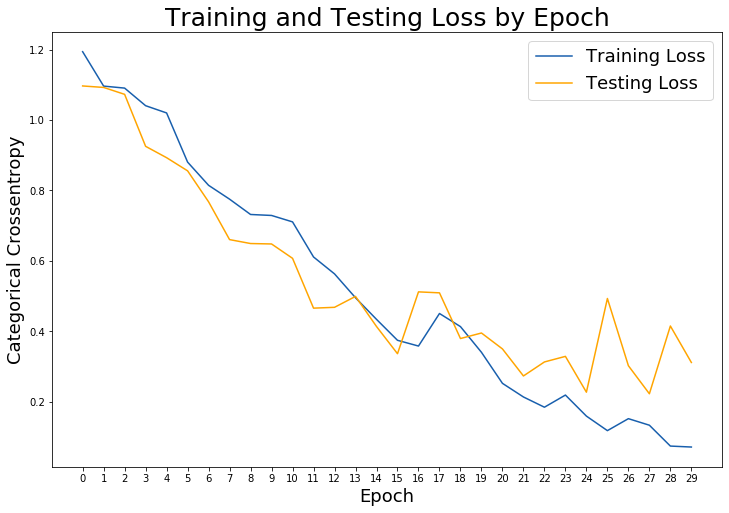

In [17]:

# Check out our train loss and test loss over epochs.
train_loss = history.history['loss']
test_loss = history.history['val_loss']
epoch_labels = history.epoch

# Set figure size.
plt.figure(figsize=(12, 8))

# Generate line plot of training, testing loss over epochs.
plt.plot(train_loss, label='Training Loss', color='#185fad')
plt.plot(test_loss, label='Testing Loss', color='orange')

# Set title
plt.title('Training and Testing Loss by Epoch', fontsize=25)
plt.xlabel('Epoch', fontsize=18)
plt.ylabel('Categorical Crossentropy', fontsize=18)
plt.xticks(epoch_labels, epoch_labels)    # ticks, labels

plt.legend(fontsize=18);

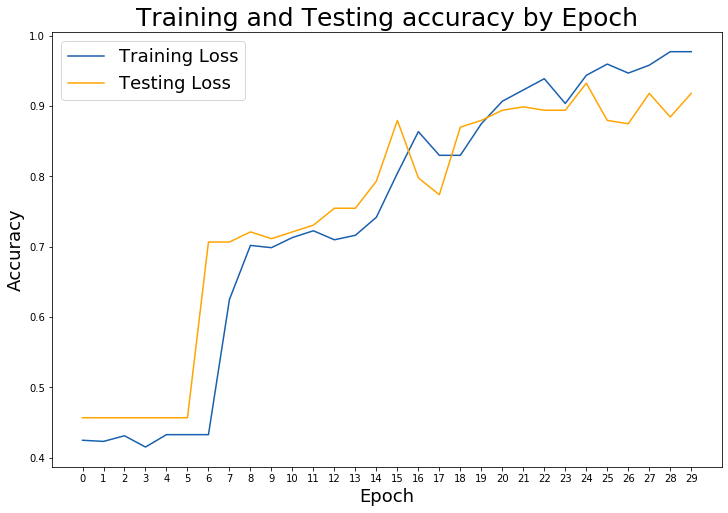

In [18]:
# Check out our train loss and test loss over epochs.
train_loss = history.history['accuracy']
test_loss = history.history['val_accuracy']
epoch_labels = history.epoch

# Set figure size.
plt.figure(figsize=(12, 8))

# Generate line plot of training, testing loss over epochs.
plt.plot(train_loss, label='Training Loss', color='#185fad')
plt.plot(test_loss, label='Testing Loss', color='orange')

# Set title
plt.title('Training and Testing accuracy by Epoch', fontsize=25)
plt.xlabel('Epoch', fontsize=18)
plt.ylabel('Accuracy', fontsize=18)
plt.xticks(epoch_labels, epoch_labels)    # ticks, labels

plt.legend(fontsize=18);

In [19]:
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 158, 158, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 79, 79, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 77, 77, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 38, 38, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 36, 36, 128)       147584    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 18, 18, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 512)       5

In [20]:
cnn_model.save('cnn_model')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: cnn_model/assets


In [21]:
cnn_score = cnn_model.evaluate(X_test,
                               y_test,
                               verbose=1)

cnn_labels = cnn_model.metrics_names

7/7 [==============================] - 1s 158ms/step - loss: 0.3119 - accuracy: 0.9183
